In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Bu satırı ekledik!

# Add the parent directory (utils folder) to the system path to import our custom modules
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import our custom data loading and model utility functions
from utils.data_loader import load_and_clean_data
from utils.model_utils import prepare_features, evaluate_model

# Set a consistent style for plots
sns.set_style('whitegrid')

In [2]:
# Create a dictionary to store our model results
results = {}

# --- Berlin Model Evaluation ---
print("Evaluating Berlin model...")
df_berlin = load_and_clean_data('berlin')
df_berlin.drop(columns=['host_since', 'calendar_last_scraped', 'first_review', 'last_review'], errors='ignore', inplace=True)
X, y = prepare_features(df_berlin, target_column='price')

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model_berlin = LinearRegression()
linear_model_berlin.fit(X_train, y_train)
y_pred_berlin = linear_model_berlin.predict(X_test)
results['berlin'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_berlin)),
    'R2': r2_score(y_test, y_pred_berlin)
}
print("Berlin model evaluation complete.")

# --- Istanbul Model Evaluation ---
print("\nEvaluating Istanbul model...")
df_istanbul = load_and_clean_data('istanbul')
df_istanbul.drop(columns=['host_since', 'calendar_last_scraped', 'first_review', 'last_review'], errors='ignore', inplace=True)
X, y = prepare_features(df_istanbul, target_column='price')

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model_istanbul = LinearRegression()
linear_model_istanbul.fit(X_train, y_train)
y_pred_istanbul = linear_model_istanbul.predict(X_test)
results['istanbul'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_istanbul)),
    'R2': r2_score(y_test, y_pred_istanbul)
}
print("Istanbul model evaluation complete.")

# --- Munich Model Evaluation ---
print("\nEvaluating Munich model...")
df_munich = load_and_clean_data('munich')
df_munich.drop(columns=['host_since', 'calendar_last_scraped', 'first_review', 'last_review'], errors='ignore', inplace=True)
X, y = prepare_features(df_munich, target_column='price')

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model_munich = LinearRegression()
linear_model_munich.fit(X_train, y_train)
y_pred_munich = linear_model_munich.predict(X_test)
results['munich'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_munich)),
    'R2': r2_score(y_test, y_pred_munich)
}
print("Munich model evaluation complete.")

Evaluating Berlin model...
Loading cleaned data for Berlin from processed directory...
Categorical features have been one-hot encoded.
Shape of features (X) after encoding: (9135, 8936)
Berlin model evaluation complete.

Evaluating Istanbul model...
Loading cleaned data for Istanbul from processed directory...
Categorical features have been one-hot encoded.
Shape of features (X) after encoding: (3340, 3524)
Istanbul model evaluation complete.

Evaluating Munich model...
Loading cleaned data for Munich from processed directory...
Categorical features have been one-hot encoded.
Shape of features (X) after encoding: (4687, 4871)
Munich model evaluation complete.



--- Model Performance Comparison ---
                RMSE        R2
berlin     93.313205  0.008292
istanbul  211.708105  0.021639
munich    142.185121 -0.001967


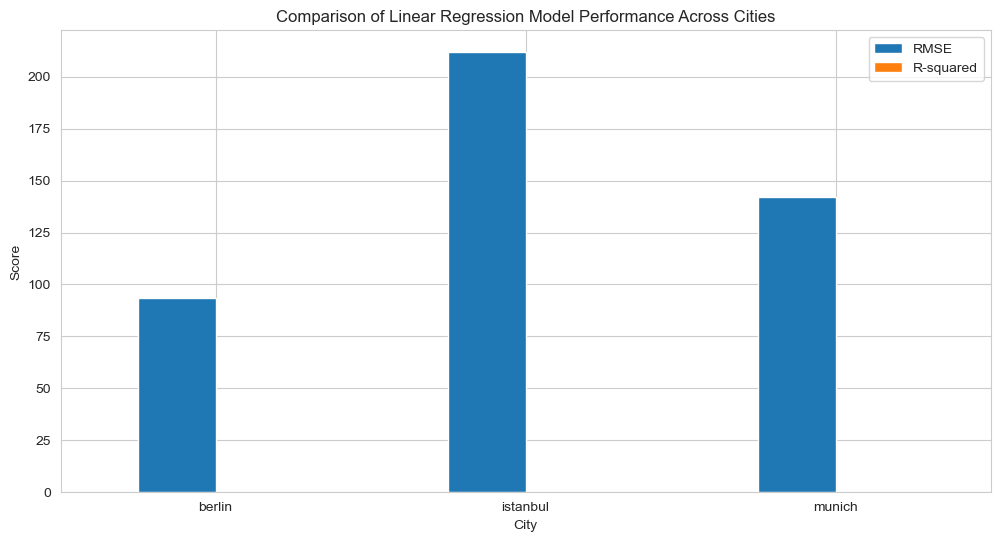

In [3]:
# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Comparison ---")
print(results_df)

# Visualize the results
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Linear Regression Model Performance Across Cities')
plt.ylabel('Score')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.legend(['RMSE', 'R-squared'])
plt.show()

# 7. Analysis of Results and Future Steps

Based on the model performance metrics, we can draw several key conclusions about our baseline Linear Regression models for each city.

## 7.1 Interpreting the Metrics

* **R-squared (R²):** This metric indicates the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. A value close to 1 is excellent, while a value close to 0 suggests the model fails to explain the price variance.
* **Root Mean Squared Error (RMSE):** This is the standard deviation of the residuals (prediction errors). A lower RMSE indicates that the model's predictions are closer to the actual values.

## 7.2 Key Findings and Analysis

| City     | RMSE        | R²          |
|----------|-------------|-------------|
| Berlin   | 93.31       | 0.008       |
| Istanbul | 211.71      | 0.022       |
| Munich   | 142.19      | -0.002      |

Our analysis reveals that the simple Linear Regression model performed poorly across all three cities. The R² values for all models are very close to zero, with Munich even showing a negative R², which suggests the model is a very weak predictor.

This poor performance is likely due to several factors:
* **Non-linear Relationships:** Airbnb pricing is a complex phenomenon influenced by many non-linear factors that a simple linear model cannot capture.
* **High Dimensionality:** The one-hot encoding created a large number of features, which can be challenging for a simple linear model to handle effectively.
* **Data Noise:** The datasets, despite initial cleaning, likely still contain noise and complex interactions between variables that a linear model cannot learn.

## 7.3 Future Steps and Improvements

Although the baseline model's performance was not strong, this project successfully established a robust and reproducible data pipeline. This pipeline serves as a strong foundation for future modeling efforts.

To improve the model's performance, the following steps could be taken:
1.  **Advanced Modeling:** Explore more sophisticated regression algorithms that can handle non-linear data more effectively, such as:
    * **Random Forest Regressor:** An ensemble method that can capture complex relationships.
    * **Gradient Boosting Regressors (XGBoost, LightGBM):** State-of-the-art models for structured data.
2.  **Advanced Feature Engineering:** Create new, more powerful features from the existing data. For example:
    * Create a "price per person" feature.
    * Develop a feature indicating the presence of a superhost.
    * Engineer a new feature representing the `host_since` variable to show host seniority.
3.  **Refined Missing Value Strategy:** Revisit the strategy for handling missing values. For instance, for review-related columns, filling `NaN` values with `0` might be more appropriate than using the mean, as a missing value